In [3]:
import pandas as pd
import numpy as np
from sklearn import datasets
data = datasets.load_breast_cancer()

In [4]:
print(data.data)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [12]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Dataset Detail
print("Matrix shape: " + repr(data.data.shape))
print("Features in dataset: ")
pprint(data.feature_names)
print("Dataset classes:")
pprint(data.target_names)

print("\nData Sample:")
df.head()

Matrix shape: (569, 30)
Features in dataset: 
array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')
Dataset classes:
array(['malignant', 'benign'], dtype='<U9')

Data Sample:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [36]:
# ------------- IMPORTING sklearn -------------
# classifying
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# pretty printing
from pprint import pprint

# visualizing 
import matplotlib.pyplot as plt
import graphviz
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

Decision Tree

In [13]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(data.data[:,0:9],data.target, shuffle=True, test_size=0.2, random_state=42)

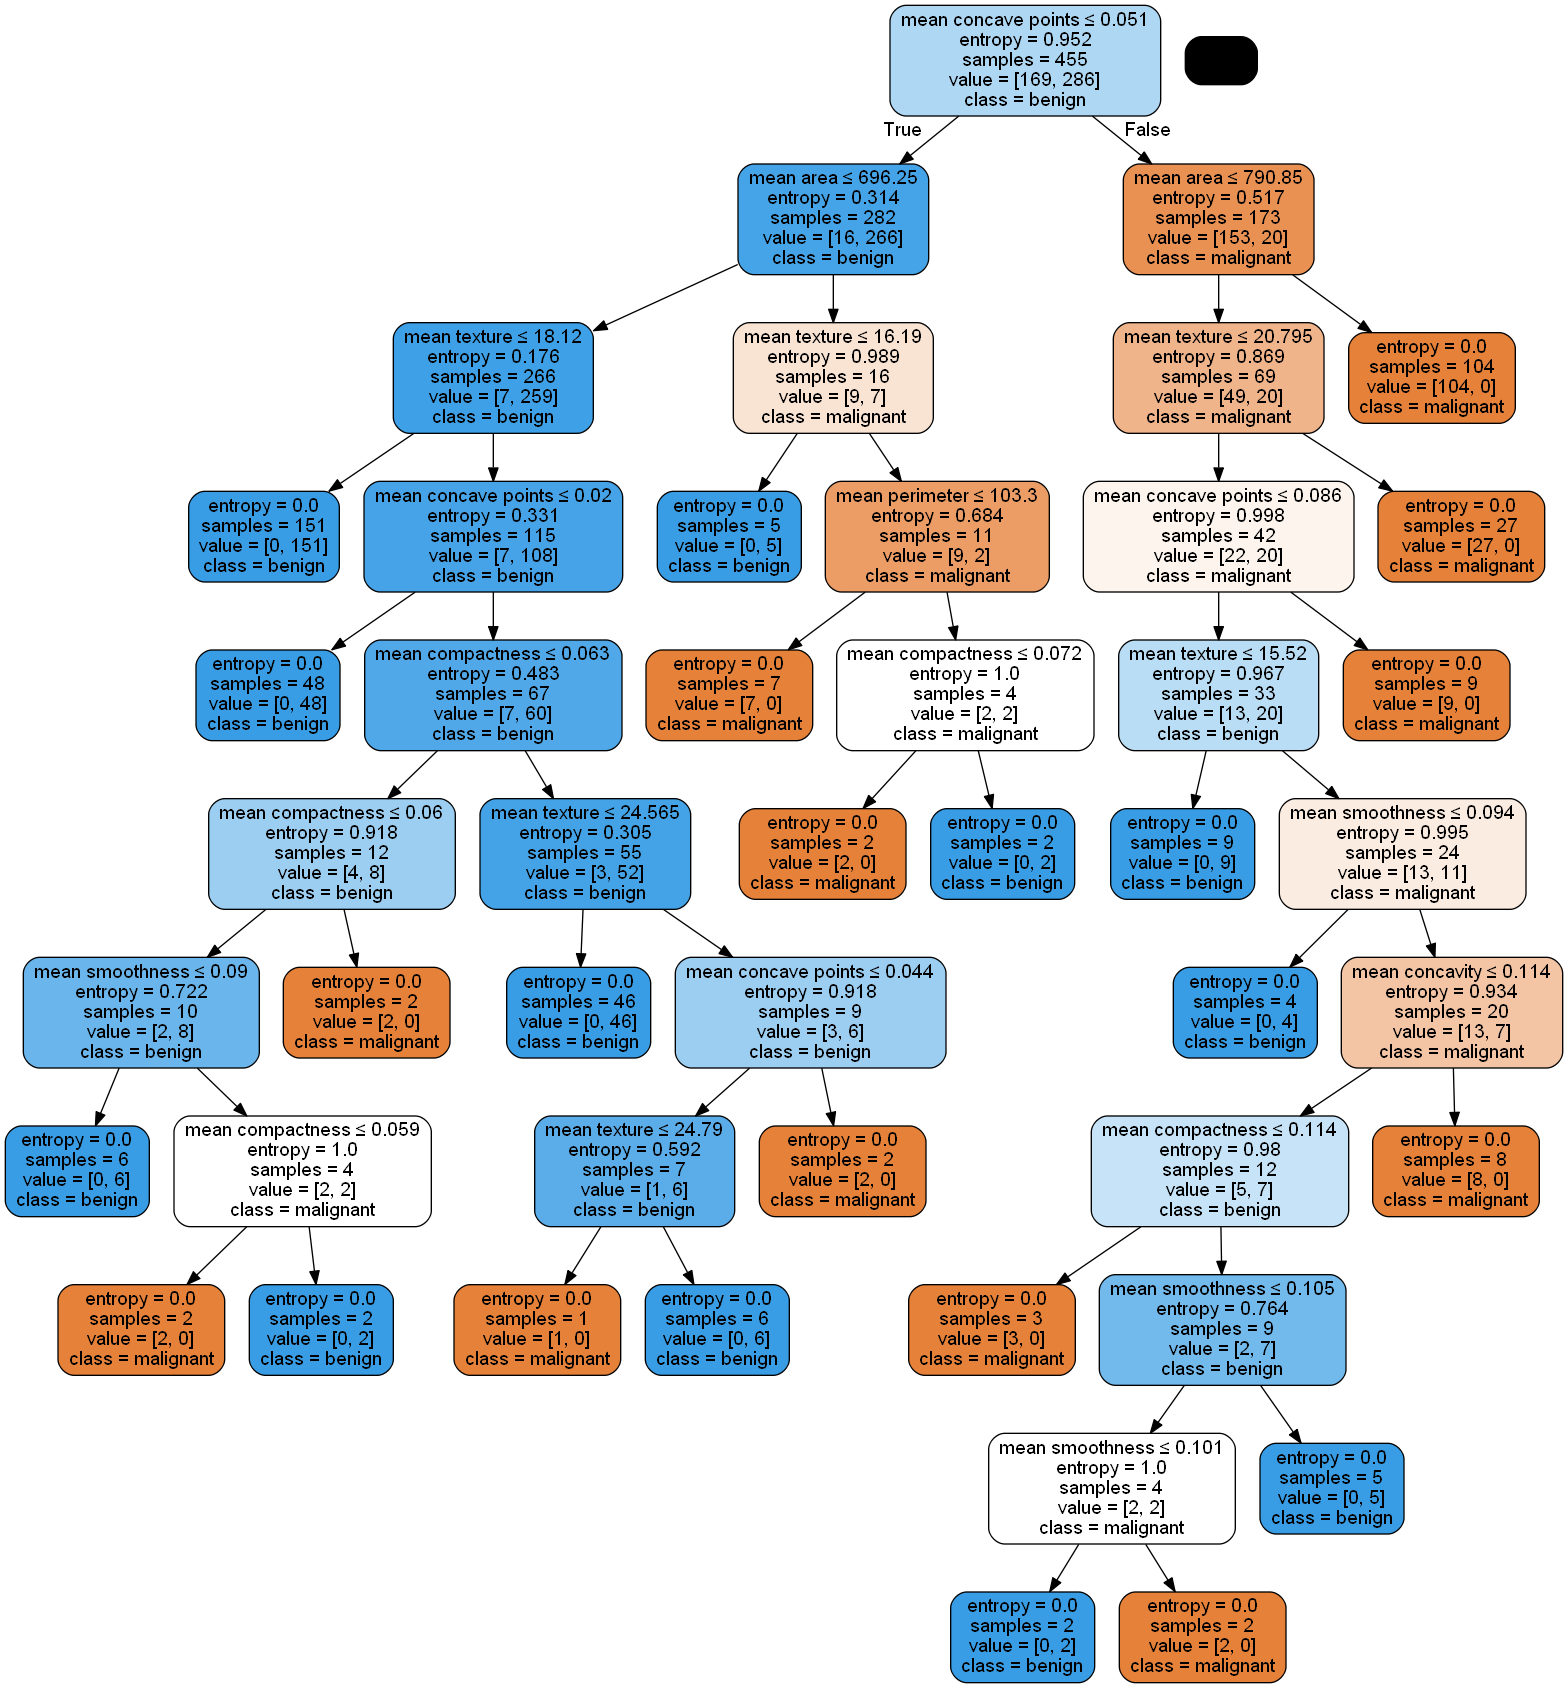

In [29]:
########### Decision Tree ############
# Initialize model
clf_dt = DecisionTreeClassifier(criterion="entropy")
# Train model
clf_dt.fit(X_train,y_train)

# Visualize decision Tree (saved in iris.pdf)
dot_data = StringIO()
export_graphviz(clf_dt, out_file=dot_data, 
                feature_names=data.feature_names[0:9],
                class_names=data.target_names,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graphviz.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [39]:
# Prediction Phase

# ------- Evaluate Accuracy Score --------
# Evaluate test data
y_test_prediction = clf_dt.predict(X_test)
accuracy_dt_test = accuracy_score(y_test,y_test_prediction)

# Evaluate training data
y_train_prediction = clf_dt.predict(X_train)
accuracy_dt_train = accuracy_score(y_train, y_train_prediction)

print("Test data accuracy : " + repr(accuracy_dt_test))
print("Train data accuracy : " + repr(accuracy_dt_train))

# ------- Evaluate F1 Score --------
f1_dt_test = f1_score(y_test, y_test_prediction)
f1_dt_train = f1_score(y_train, y_train_prediction)


print("Test data F1 score : " + repr(f1_dt_test))
print("Train data F1 score : " + repr(f1_dt_train))

# Conclusion:
# Skor Akurasi dan F1 data train bernilai 1 yang berarti model memetakan seluruh data train dengan benar.
# Namun akurasi data test adalah sekitar 0.93 (accuracy score) dan 0.94 (F1 score). Perbedaan ini menandakan bahwa terjadinya overfitting.

Test data accuracy : 0.9298245614035088
Train data accuracy : 1.0
Test data F1 score : 0.9436619718309859
Train data F1 score : 1.0
